In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras import optimizers

In [26]:
train = pd.read_csv('SQLIV3_cleaned2.csv')
test = pd.read_csv('sqliv2_utf8.csv')

In [27]:
print(train.Label.value_counts())

Label
0    19268
1    11346
Name: count, dtype: int64


In [28]:
X_train = train['Sentence'].values
y_train = train['Label'].values

In [29]:
# Tokenisation des textes
vocab_size = 5000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)

In [30]:
max_len = 100  # À ajuster en fonction de la longueur moyenne des séquences
X_train = pad_sequences(X_train_seq, maxlen=max_len, padding='post')

In [31]:
# Préparer les données de test
test_x = test['Sentence'].values
test_y = test['Label'].values
test = test.dropna(subset=['Sentence'])

In [32]:
# Tokenisation pour les données de test
test['Sentence'] = test['Sentence'].astype(str)
test_x = tokenizer.texts_to_sequences(test['Sentence'])
test_x = pad_sequences(test_x, maxlen=max_len, padding='post')


In [33]:
X_train = np.expand_dims(X_train, axis=-1)


In [34]:
# Définition du modèle
model = Sequential()

# Ajouter la première couche LSTM et Dropout
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, ))
model.add(Dropout(0.2))

# Ajouter la deuxième couche LSTM et Dropout
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

# Ajouter la troisième couche LSTM et Dropout
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))

# Ajouter la quatrième couche LSTM et Dropout
model.add(SimpleRNN(units=50, activation='tanh'))
model.add(Dropout(0.2))

# Ajouter la couche de sortie
model.add(Dense(units=1, activation='sigmoid'))

# Compilation du modèle avec la pondération des classes pour gérer l'équilibre des classes
class_weights = {0: 1, 1: 10}  # Ponderation de la classe 1 pour contrer le déséquilibre
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weights)


Epoch 1/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 50s 57ms/step - accuracy: 0.4657 - loss: 1.8380 - val_accuracy: 0.0000e+00 - val_loss: 2.4716
Epoch 2/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 69s 91ms/step - accuracy: 0.4578 - loss: 1.7651 - val_accuracy: 0.0000e+00 - val_loss: 2.3818
Epoch 3/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 68s 89ms/step - accuracy: 0.4565 - loss: 1.6930 - val_accuracy: 0.0000e+00 - val_loss: 2.5341
Epoch 4/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 69s 91ms/step - accuracy: 0.4683 - loss: 1.5900 - val_accuracy: 0.0000e+00 - val_loss: 2.7326
Epoch 5/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 68s 88ms/step - accuracy: 0.4668 - loss: 1.5738 - val_accuracy: 0.0000e+00 - val_loss: 2.5895
Epoch 6/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 69s 90ms/step - accuracy: 0.4649 - loss: 1.7123 - val_accuracy: 0.0000e+00 - val_loss: 2.3768
Epoch 7/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 68s 88ms/step - accuracy: 0.4647 - loss: 1.7316 - val_accuracy: 0.0000e+00 - val_loss: 2.1984
Epoch 8/30
766/766 ━━━━━━━━━━━━━━━━━━━━ 67s 88ms/step - accura

In [35]:
accuracy = model.evaluate(test_x, test_y)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 33757
'y' sizes: 33760


In [ ]:
print(f'Accuracy sur le jeu de test : {accuracy[1]:.4f}')

Accuracy sur le jeu de test : 0.0000


In [ ]:
# Affichage de la perte et de la précision après l'entraînement
print("Final Training Loss:", history.history['loss'][-1])
print("Final Training Accuracy:", history.history['accuracy'][-1])

Final Training Loss: 0.6593706607818604
Final Training Accuracy: 0.629385232925415


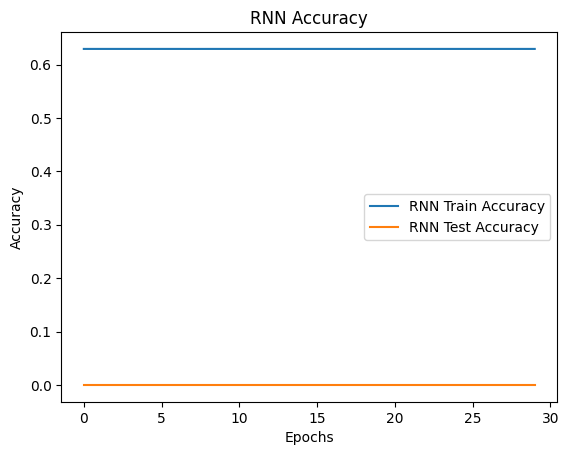

In [ ]:
# Affichage de l'évolution de la perte et de la précision pour le RNN
plt.plot(history.history['accuracy'], label='RNN Train Accuracy')
plt.plot(history.history['val_accuracy'], label='RNN Test Accuracy')
plt.title('RNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Compter le nombre de prédictions égales à 1 (SQL injection détectée)
nombre_de_sql_injections = (predicted_classes == 1).sum()

print(f"Nombre de requêtes détectées comme SQL injection : {nombre_de_sql_injections}")

# Calculer l'accuracy après les prédictions
accuracy = nombre_de_sql_injections / len(test_x)
print(f"Accuracy après test avec le deuxième dataset avec les injections SQL : {accuracy}")

Nombre de requêtes détectées comme SQL injection : 0
Accuracy après test avec le deuxième dataset avec les injections SQL : 0.0
